In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
class GeneticAlgorithmTSP:
    def __init__(self, matriz_custo, tamanho_populacao=100, taxa_mutacao=0.01, 
                 taxa_cruzamento=0.8, num_geracoes=300, tamanho_torneio=5):
        """
        Inicializa o Algoritmo Genético para o Problema do Caixeiro Viajante
        
        Parâmetros:
        - matriz_custo: Matriz de custos entre cidades
        - tamanho_populacao: Número de rotas na população
        - taxa_mutacao: Probabilidade de mutação de um gene
        - taxa_cruzamento: Probabilidade de cruzamento entre dois pais
        - num_geracoes: Número de gerações a serem evoluídas
        - tamanho_torneio: Número de indivíduos que competem em cada torneio
        """
        self.matriz_custo = matriz_custo
        self.num_cidades = len(matriz_custo)
        self.tamanho_populacao = tamanho_populacao
        self.taxa_mutacao = taxa_mutacao
        self.taxa_cruzamento = taxa_cruzamento
        self.num_geracoes = num_geracoes
        self.tamanho_torneio = tamanho_torneio
        
    def gerar_rota_aleatoria(self):
        """
        Gera uma rota aleatória visitando todas as cidades
        """
        rota = list(range(self.num_cidades))
        random.shuffle(rota)
        rota.append(rota[0])  # Retorna à cidade inicial
        return rota
    
    def criar_populacao_inicial(self):
        """
        Cria população inicial de rotas
        """
        return [self.gerar_rota_aleatoria() for _ in range(self.tamanho_populacao)]
    
    def calcular_custo_rota(self, rota):
        """
        Calcula o custo total de uma rota
        """
        custo = 0
        for i in range(len(rota) - 1):
            custo += self.matriz_custo[rota[i]][rota[i+1]]
        return custo
    
    def selecao_torneio(self, populacao, custos):
        """
        Seleção por torneio - seleciona pais para reprodução
        
        Neste método:
        1. Seleciona aleatoriamente um subgrupo (torneio) da população
        2. Escolhe o melhor indivíduo deste subgrupo (aquele com menor custo)
        3. Repete o processo para selecionar o segundo pai
        
        Parâmetros:
        - populacao: Lista de rotas
        - custos: Lista de custos correspondentes às rotas
        
        Retorna:
        Dois pais selecionados para reprodução
        """
        # Função para realizar um único torneio
        def realizar_torneio():
            # Seleciona participantes do torneio aleatoriamente
            indices_torneio = random.sample(range(len(populacao)), self.tamanho_torneio)
            
            # Encontra o melhor (menor custo) entre os participantes do torneio
            custos_torneio = [custos[i] for i in indices_torneio]
            melhor_indice_torneio = indices_torneio[custos_torneio.index(min(custos_torneio))]
            
            return populacao[melhor_indice_torneio]
        
        # Seleciona dois pais através de torneios independentes
        pai1 = realizar_torneio()
        pai2 = realizar_torneio()
        
        return pai1, pai2
    
    def crossover(self, pai1, pai2):
        """
        Cruzamento de ordem para rotas
        """
        # Remove a última cidade (que é uma cópia da primeira)
        pai1 = pai1[:-1]
        pai2 = pai2[:-1]
        
        # Pontos de corte
        inicio = random.randint(0, len(pai1)-2)
        fim = random.randint(inicio+1, len(pai1)-1)
        
        # Cria filho
        filho = [None] * len(pai1)
        filho[inicio:fim+1] = pai1[inicio:fim+1]
        
        # Preenche o restante com genes do pai2 que não estão no filho
        restantes = [cidade for cidade in pai2 if cidade not in filho]
        j = 0
        for i in range(len(filho)):
            if filho[i] is None:
                filho[i] = restantes[j]
                j += 1
        
        # Adiciona a primeira cidade no final para completar o ciclo
        filho.append(filho[0])
        return filho
    
    def mutacao(self, rota):
        """
        Mutação por troca de duas cidades na rota
        """
        # Remove a última cidade (que é uma cópia da primeira)
        rota = rota[:-1]
        
        if random.random() < self.taxa_mutacao:
            # Seleciona duas posições aleatórias para trocar
            i, j = random.sample(range(len(rota)), 2)
            rota[i], rota[j] = rota[j], rota[i]
        
        # Adiciona a primeira cidade no final para completar o ciclo
        rota.append(rota[0])
        return rota
    
    def executar(self):
        """
        Executa o Algoritmo Genético
        """
        # Inicializa população
        populacao = self.criar_populacao_inicial()
        
        # Histórico de melhores custos
        historico_melhor_custo = []
        
        # Variáveis para armazenar a melhor solução global
        melhor_rota_global = None
        melhor_custo_global = float('inf')
        
        # Evolução através das gerações
        for geracao in range(self.num_geracoes):
            # Calcula custos da população atual
            custos = [self.calcular_custo_rota(rota) for rota in populacao]
            
            # Encontra melhor rota da geração atual
            melhor_indice = custos.index(min(custos))
            melhor_rota_geracao = populacao[melhor_indice]
            melhor_custo_geracao = custos[melhor_indice]
            
            # Atualiza melhor solução global
            if melhor_custo_geracao < melhor_custo_global:
                melhor_rota_global = melhor_rota_geracao
                melhor_custo_global = melhor_custo_geracao
            
            # Armazena o melhor custo da geração
            historico_melhor_custo.append(melhor_custo_global)
            
            # Nova população
            nova_populacao = []
            
            # Criar nova geração
            while len(nova_populacao) < self.tamanho_populacao:
                # Seleção de pais por torneio
                pai1, pai2 = self.selecao_torneio(populacao, custos)
                
                # Cruzamento
                if random.random() < self.taxa_cruzamento:
                    filho = self.crossover(pai1, pai2)
                else:
                    filho = pai1
                
                # Mutação
                filho = self.mutacao(filho)
                
                nova_populacao.append(filho)
            
            # Atualiza população
            populacao = nova_populacao
        
        return melhor_rota_global, melhor_custo_global, historico_melhor_custo

In [3]:
class AntColonyOptimization:
    def __init__(self, matriz_custo, num_formigas=10, evaporacao=0.5, alpha=1, beta=2, q=100, iteracoes=100):
        """
        Inicializa o algoritmo de Colônia de Formigas
        
        Parâmetros:
        - matriz_custo: Matriz de custos entre cidades
        - num_formigas: Número de formigas na colônia
        - evaporacao: Taxa de evaporação do feromônio
        - alpha: Importância do feromônio
        - beta: Importância da distância
        - q: Constante de depósito de feromônio
        - iteracoes: Número de iterações do algoritmo
        """
        self.distancia = matriz_custo
        self.num_cidades = len(matriz_custo)
        self.num_formigas = num_formigas
        self.evaporacao = evaporacao
        self.alpha = alpha
        self.beta = beta
        self.q = q
        self.iteracoes = iteracoes
        
        # Inicializa feromônios
        self.feromonio = np.ones((self.num_cidades, self.num_cidades))
        np.fill_diagonal(self.feromonio, 0)
        
        # Adiciona um pequeno valor para evitar divisão por zero
        self.distancia = np.where(self.distancia == 0, 1e-10, self.distancia)
        
    def selecionar_proxima_cidade(self, cidade_atual, cidades_nao_visitadas, feromonio, distancia):
        """
        Seleciona a próxima cidade baseado na probabilidade de transição
        """
        probabilidades = np.zeros(len(cidades_nao_visitadas))
        
        for i, cidade in enumerate(cidades_nao_visitadas):
            # Calcula probabilidade de transição
            # Adiciona um valor muito pequeno para evitar divisão por zero
            probabilidades[i] = (
                feromonio[cidade_atual][cidade] ** self.alpha * 
                (1.0 / (distancia[cidade_atual][cidade] + 1e-10)) ** self.beta
            )
        
        # Verifica se todas as probabilidades são zero
        if np.sum(probabilidades) == 0:
            # Se todas probabilidades forem zero, escolhe aleatoriamente
            return np.random.choice(cidades_nao_visitadas)
        
        # Normaliza probabilidades
        probabilidades /= probabilidades.sum()
        
        # Seleciona cidade por roleta
        return np.random.choice(cidades_nao_visitadas, p=probabilidades)

    def calcular_custo_rota(self, rota):
        """
        Calcula o custo total de uma rota
        """
        custo = 0
        for i in range(len(rota) - 1):
            custo += self.distancia[rota[i]][rota[i+1]]
        return custo

    def construir_solucao(self):
        """
        Constrói uma solução completa para o problema do caixeiro viajante
        """
        cidade_inicial = random.randint(0, self.num_cidades - 1)
        cidades_nao_visitadas = list(range(self.num_cidades))
        cidades_nao_visitadas.remove(cidade_inicial)
        
        rota = [cidade_inicial]
        cidade_atual = cidade_inicial
        
        while cidades_nao_visitadas:
            proxima_cidade = self.selecionar_proxima_cidade(
                cidade_atual, 
                cidades_nao_visitadas, 
                self.feromonio, 
                self.distancia
            )
            
            rota.append(proxima_cidade)
            cidades_nao_visitadas.remove(proxima_cidade)
            cidade_atual = proxima_cidade
        
        rota.append(rota[0])  # Retorna à cidade inicial
        return rota

    def atualizar_feromonio(self, melhor_rota, melhor_custo):
        """
        Atualiza os níveis de feromônio após cada iteração
        """
        # Evapora feromônios
        self.feromonio *= (1 - self.evaporacao)
        
        # Deposita feromônios na melhor rota
        for i in range(len(melhor_rota) - 1):
            cidade_origem = melhor_rota[i]
            cidade_destino = melhor_rota[i+1]
            self.feromonio[cidade_origem][cidade_destino] += self.q / (melhor_custo + 1e-10)
            self.feromonio[cidade_destino][cidade_origem] += self.q / (melhor_custo + 1e-10)

    def executar(self):
        """
        Executa o algoritmo de Colônia de Formigas
        """
        historico_melhor_custo = []
        melhor_rota_global = None
        melhor_custo_global = float('inf')

        for iteracao in range(self.iteracoes):
            rotas_formigas = []
            custos_formigas = []

            # Construção das rotas por cada formiga
            for _ in range(self.num_formigas):
                rota = self.construir_solucao()
                custo = self.calcular_custo_rota(rota)
                rotas_formigas.append(rota)
                custos_formigas.append(custo)

            # Encontra melhor rota da iteração
            melhor_indice = custos_formigas.index(min(custos_formigas))
            melhor_rota_iteracao = rotas_formigas[melhor_indice]
            melhor_custo_iteracao = custos_formigas[melhor_indice]

            # Atualiza melhor rota global
            if melhor_custo_iteracao < melhor_custo_global:
                melhor_rota_global = melhor_rota_iteracao
                melhor_custo_global = melhor_custo_iteracao

            # Atualiza feromônios
            self.atualizar_feromonio(melhor_rota_iteracao, melhor_custo_iteracao)

            historico_melhor_custo.append(melhor_custo_global)

        return melhor_rota_global, melhor_custo_global, historico_melhor_custo

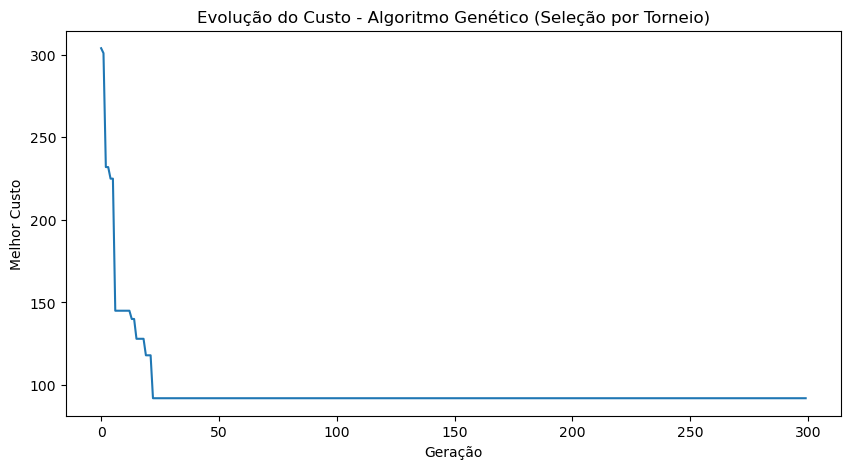

Melhor Rota: [13, 14, 2, 3, 5, 6, 7, 8, 9, 11, 12, 10, 1, 0, 4, 13]
Melhor Custo: 92


In [4]:
matriz_custo = [
    [0, 15, 10, 100, 17, 25, 25, 8, 21, 25, 38, 10, 5, 33, 25],   # Cidade 1 (origem)
    [10, 0, 80, 10, 30, 70, 19, 41, 34, 100, 20, 50, 80, 90, 70], # Cidade 2 (origem)
    [15, 80, 0, 5, 50, 90, 18, 50, 17, 5, 23, 55, 10, 40, 45],    # Cidade 3 (origem)
    [45, 100, 5, 0, 100, 20, 100, 70, 10, 5, 33, 45, 50, 5, 50],  # Cidade 4 (origem)
    [5, 30, 40, 100, 0, 11, 40, 25, 40, 45, 50, 70, 15, 10, 5],   # Cidade 5 (origem)
    [45, 20, 100, 21, 45, 0, 0, 33, 55, 20, 55, 60, 90, 25, 45],  # Cidade 6 (origem)
    [50, 25, 50, 15, 10, 15, 0, 0, 33, 40, 70, 50, 0, 90, 20],    # Cidade 7 (origem)
    [44, 80, 21, 70, 33, 35, 35, 0, 0, 10, 30, 33, 80, 20, 100],  # Cidade 8 (origem)
    [30, 45, 70, 55, 34, 15, 55, 20, 0, 0, 13, 40, 25, 50, 25],   # Cidade 9 (origem)
    [100, 41, 55, 35, 40, 38, 41, 40, 47, 13, 0, 10, 90, 44, 50], # Cidade 10 (origem)
    [67, 5, 10, 41, 76, 40, 100, 30, 76, 25, 14, 0, 5, 43, 35],   # Cidade 11 (origem)
    [33, 44, 35, 20, 50, 51, 18, 18, 40, 30, 0, 10, 5, 5, 10],    # Cidade 12 (origem)
    [90, 100, 25, 35, 15, 10, 14, 30, 50, 30, 0, 100, 0, 0, 90],  # Cidade 13 (origem)
    [17, 30, 21, 21, 15, 30, 100, 41, 40, 40, 50, 50, 25, 0, 5],  # Cidade 14 (origem)
    [50, 10, 5, 5, 23, 23, 5, 21, 90, 41, 23, 23, 40, 40, 0]      # Cidade 15 (origem)
]

ga = GeneticAlgorithmTSP(matriz_custo, tamanho_torneio=3)
melhor_rota, melhor_custo, historico_custos = ga.executar()

plt.figure(figsize=(10, 5))
plt.plot(historico_custos)
plt.title("Evolução do Custo - Algoritmo Genético (Seleção por Torneio)")
plt.xlabel("Geração")
plt.ylabel("Melhor Custo")
plt.show()
 
print("Melhor Rota:", melhor_rota)
print("Melhor Custo:", melhor_custo)

Melhor Rota: [3, 2, 0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 3]
Melhor Custo: 78.0


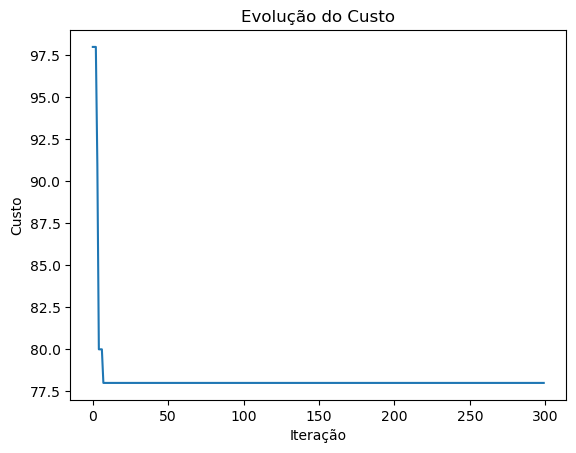

In [5]:
aco = AntColonyOptimization(
        matriz_custo, 
        num_formigas=20, 
        iteracoes=300
    )

melhor_rota, melhor_custo, historico_custos = aco.executar()

print("Melhor Rota:", melhor_rota)
print("Melhor Custo:", melhor_custo)

# Plotar evolução do custo
plt.plot(historico_custos)
plt.title("Evolução do Custo")
plt.xlabel("Iteração")
plt.ylabel("Custo")
plt.show()